In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus


In [11]:
data =pd.read_csv('student_performance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race/ethnicity               1000 non-null   int64  
 2   parental level of education  1000 non-null   int64  
 3   lunch                        1000 non-null   int64  
 4   test preparation course      1000 non-null   int64  
 5   DP score                     1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Percentage                   1000 non-null   float64
 9   grade                        1000 non-null   int64  
 10  total_score                  1000 non-null   int64  
 11  percentage                   1000 non-null   float64
 12  pass_DP                      1000 non-null   int64  
 13  pass_reading       

In [14]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
DP score                       0
reading score                  0
writing score                  0
dtype: int64

In [15]:
data.shape

(1000, 8)

In [16]:
data.describe()

,DP score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
print(data['gender'].unique())

['female' 'male']


In [23]:
print(data['race/ethnicity'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


In [24]:
print(data['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [26]:
print(data['lunch'].unique())

['standard' 'free/reduced']


In [36]:
print(data['test preparation course'].unique())

['none' 'completed']


# Exploratory Data Analysis

#### 1. Pairplot

In [37]:
sns.set_style('darkgrid')

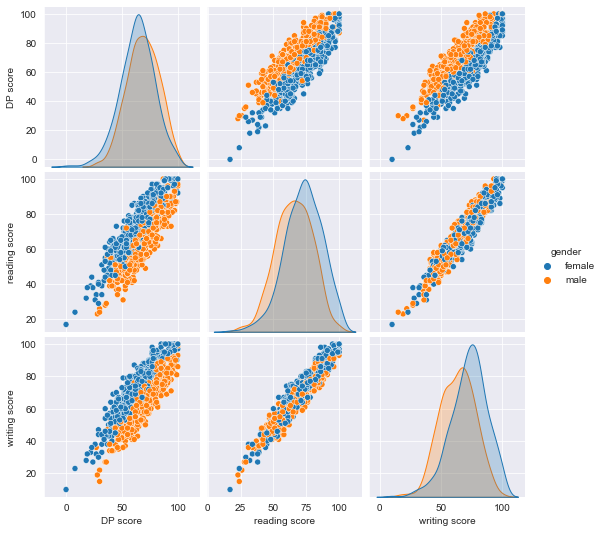

In [31]:
sns.pairplot(data, hue = 'gender')
plt.show()

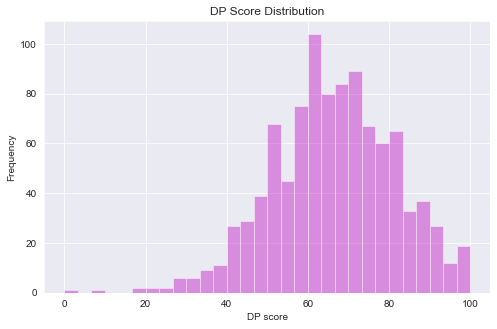

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(data['DP score'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('DP Score Distribution')
plt.show()

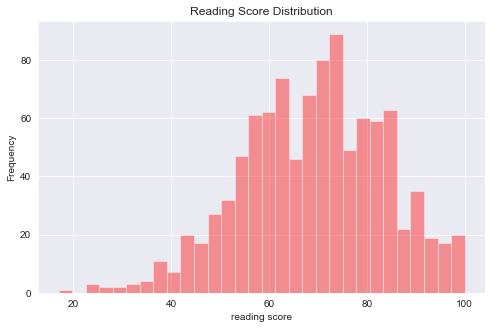

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(data['reading score'], kde = False, color='r', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.show()

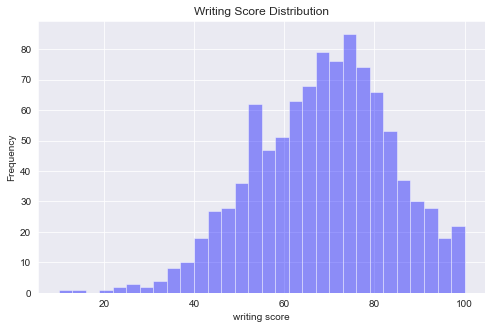

In [35]:
plt.figure(figsize=(8,5))
sns.distplot(data['writing score'], kde = False, color='blue', bins = 30)
plt.ylabel('Frequency')
plt.title('Writing Score Distribution')
plt.show()

# Data Visualization and Interpretation

### 1. Bar Plot of Scores according to gender

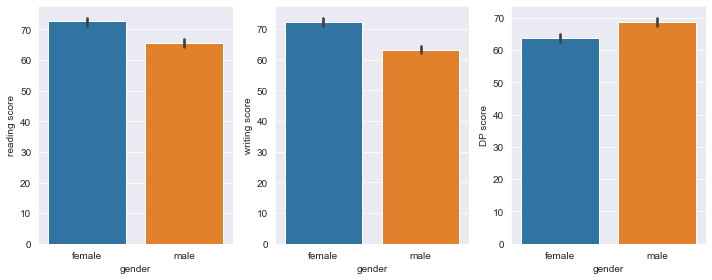

In [41]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = data)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = data)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'DP score', data = data)

plt.tight_layout()

### 2. Bar plot of Scores on the basis of Race/Ethnicity

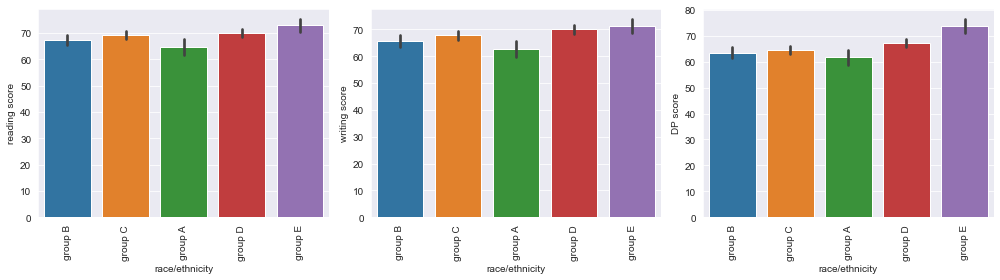

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'race/ethnicity', y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'race/ethnicity', y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'race/ethnicity', y = 'DP score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

### 3. Bar plots of Scores on the basis of Test Prepration Course

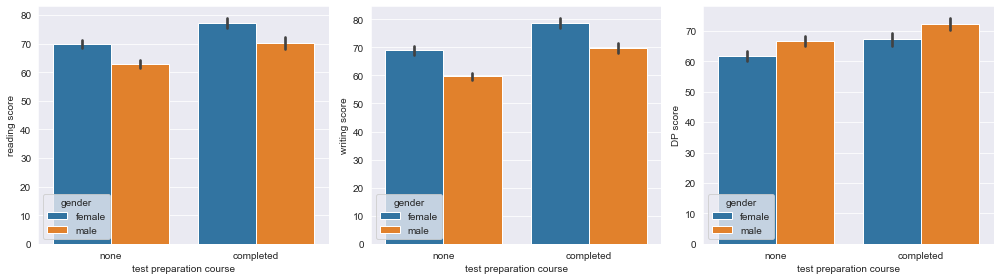

In [42]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'DP score',hue = 'gender', data = df)

plt.tight_layout()

### 4. Bar Plots of Scores on the basis of Parent's Education Level

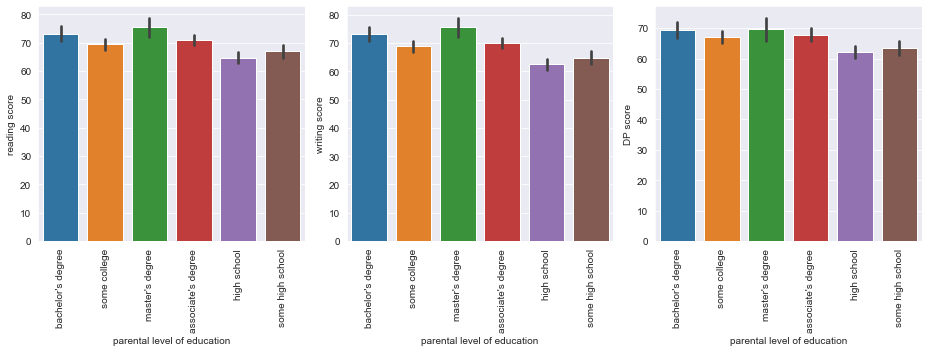

In [46]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.barplot(x = 'parental level of education', y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'parental level of education', y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'parental level of education', y = 'DP score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

### 5. Bar Plots of Scores on the basis of Types of Luch

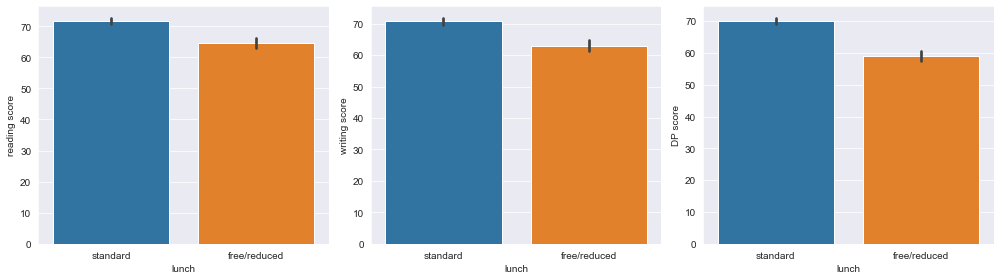

In [44]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'lunch', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'lunch', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'lunch', y = 'DP score', data = df)


plt.tight_layout()

# Data Prep

Text(0, 0.5, 'Count')

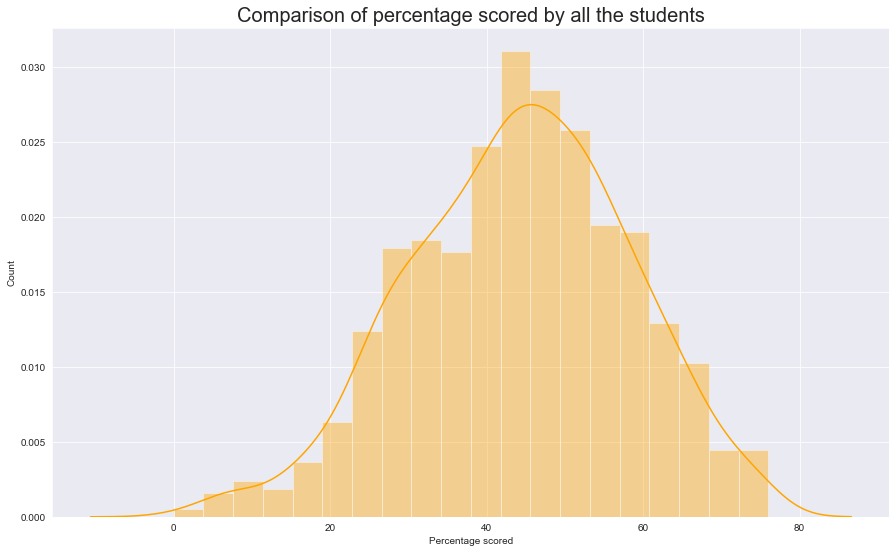

In [116]:
from math import * 

import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['DP score'] + data['reading score'] + data['writing score']

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')

In [89]:
# setting a passing mark for the students to pass on the three subjects individually
passmarks = 40

# creating a new column pass_math, this column will tell us whether the students are pass or fail
data['pass_DP'] = np.where(data['DP score']< passmarks, 'Fail', 'Pass')
data['pass_reading'] = np.where(data['reading score']< passmarks, 'Fail', 'Pass')

data['pass_writing'] = np.where(data['writing score']< passmarks, 'Fail', 'Pass')

<AxesSubplot:ylabel='status'>

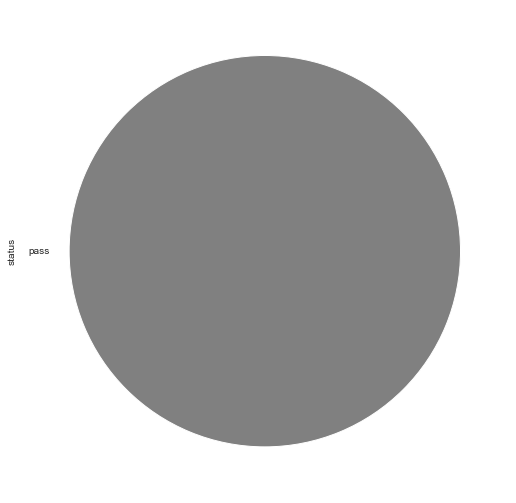

In [98]:
data['status'] = data.apply(lambda x : 'Fail' if x['pass_DP'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])

In [99]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score,Percentage,grade,total_score,percentage,pass_DP,pass_reading,pass_writing,status,grades
0,0,2,1,1,1,52,44,50,72.666667,1,146,49.0,1,1,1,pass,D
1,0,3,4,1,0,49,62,64,82.333333,0,175,59.0,1,1,1,pass,D
2,0,2,3,1,1,70,67,69,92.666667,0,206,69.0,1,1,1,pass,C
3,1,1,0,0,1,27,29,20,49.333333,4,76,26.0,0,0,0,pass,E
4,1,3,4,1,1,56,50,51,76.333333,1,157,53.0,1,1,1,pass,D
5,0,2,0,1,1,51,55,54,77.333333,1,160,54.0,1,1,1,pass,D
6,0,2,4,1,0,68,67,68,91.666667,0,203,68.0,1,1,1,pass,C
7,1,2,4,0,1,20,15,15,40.666667,5,50,17.0,0,0,0,pass,E
8,1,4,2,0,0,44,36,43,65.000000,2,123,41.0,1,0,1,pass,E
9,0,2,2,0,1,18,32,26,49.333333,4,76,26.0,0,0,0,pass,E


In [115]:
def getgrade(percentage, status):
      if status == 'Fail':
        return 'E'
      if(percentage >= 90):
        return 'O'
      if(percentage >= 80):
        return 'A'
      if(percentage >= 70):
        return 'B'
      if(percentage >= 60):
        return 'C'
      if(percentage >= 40):
        return 'D'
      else :
        return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

D    506
E    355
C    110
B     29
Name: grades, dtype: int64

In [124]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['pass_DP'] = le.fit_transform(data['pass_DP'])

# label encoding for pass_reading
data['pass_reading'] = le.fit_transform(data['pass_reading'])

# label encoding for pass_writing
data['pass_writing'] = le.fit_transform(data['pass_writing'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])
data['grade'] = le.fit_transform(data['grade'])

In [118]:

x = data.iloc[:,:14]
y = data.iloc[:,14]

print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [119]:
data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,DP score,reading score,writing score,Percentage,grade,total_score,percentage,pass_DP,pass_reading,pass_writing
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,3.174000,2.486000,0.645000,0.642000,46.145000,41.212000,44.104000,67.770667,1.981000,131.461000,44.156000,0.677000,0.551000,0.636000
std,0.499926,1.157179,1.829522,0.478753,0.479652,14.980667,14.382695,15.043254,14.257326,1.440387,42.219628,14.083253,0.467857,0.497641,0.481389
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,0.000000,37.000000,31.000000,33.750000,58.333333,1.000000,103.000000,35.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,2.000000,1.000000,1.000000,46.000000,42.000000,45.000000,68.333333,2.000000,133.000000,45.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,4.000000,1.000000,1.000000,57.000000,51.000000,55.000000,77.666667,3.000000,161.000000,54.000000,1.000000,1.000000,1.000000
max,1.000000,5.000000,5.000000,1.000000,1.000000,80.000000,71.000000,76.000000,100.000000,6.000000,227.000000,76.000000,1.000000,1.000000,1.000000


In [120]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(750, 14)
(750,)
(250, 14)
(250,)


# Machine Learning

In [97]:

from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [123]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.head())

(750, 14)
(750,)
(250, 14)
(250,)
     gender  race/ethnicity  parental level of education  lunch  \
116       0               2                            1      0   
902       0               1                            2      0   
549       1               3                            3      1   
327       1               1                            4      0   
164       0               5                            3      1   

     test preparation course  DP score  reading score  writing score  \
116                        1        55             57             58   
902                        0        14             20             17   
549                        1        59             44             45   
327                        1         9              1              2   
164                        1        61             64             67   

     Percentage  grade  total_score  percentage  pass_DP  pass_reading  
116   80.666667      1          170        57.0        1 

In [109]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['DP score'] = le.fit_transform(data['DP score'])

# label encoding for pass_reading
data['reading score'] = le.fit_transform(data['reading score'])

# label encoding for pass_writing
data['writing score'] = le.fit_transform(data['writing score'])

# label encoding for status
data['grade'] = le.fit_transform(data['grade'])

In [121]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()
# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)


In [143]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [144]:
m6 = 'DecisionTreeClassifier'
model= DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


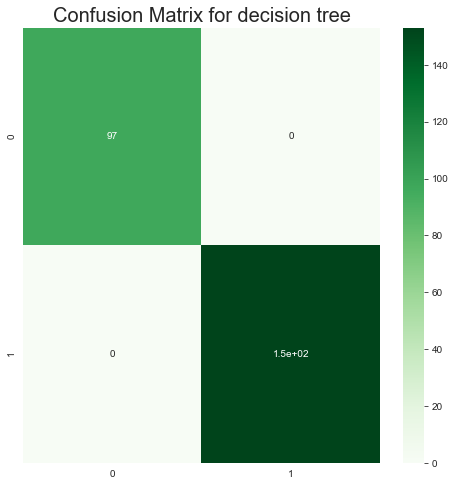

In [145]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for decision tree', fontweight = 30, fontsize = 20)
plt.show()

In [1]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dtree = dt.fit(x_train, y_train)
dt_predicted = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))
data = tree.export_graphviz(dtree, out_file=None)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('myDT.png')
img=pltimg.imread('myDT.png')
imgplot = plt.imshow(img)
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined

In [147]:
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 1.0
Testing Accuracy : 1.0


In [148]:
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the x-test results
y_pred = model.predict(x_test)

# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


In [ ]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('myDT.png')
img=pltimg.imread('myDT.png')
imgplot = plt.imshow(img)
plt.show()